In [183]:
# Import Libraries and Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.model_selection import train_test_split    # To split the dataset into train and test sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder   # For scaling and encoding categorical variables
from sklearn.compose import ColumnTransformer           # To apply transformers to specific columns
from sklearn.impute import SimpleImputer                # For handling missing data
from sklearn.ensemble import RandomForestClassifier     # Random Forest Classifier
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.svm import SVC                            # Support Vector Classifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score # For evaluating the model
import joblib
from xgboost import XGBClassifier



In [184]:
# import the data to dataframe
hr_data = pd.read_csv('resources/HR-Employee-Attrition.csv')
hr_data.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [185]:
#examine the data
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [186]:
hr_data["Attrition"].value_counts()


Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [187]:
#convert the target variable to binary
hr_data['Attrition'] = hr_data['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 


In [188]:
#check to see if target variable is binary
hr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [189]:
#list columns with object data type
hr_data.select_dtypes(include='object')

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
...,...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,Y,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Y,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,Y,No


In [190]:
#print the unique values of the object columns
print(hr_data['BusinessTravel'].value_counts())
print("--------------------------------")
print(hr_data['Department'].value_counts())
print("--------------------------------")
print(hr_data['EducationField'].value_counts())
print("--------------------------------")
print(hr_data['Gender'].value_counts())
print("--------------------------------")




BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64
--------------------------------
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64
--------------------------------
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64
--------------------------------
Gender
Male      882
Female    588
Name: count, dtype: int64
--------------------------------


In [191]:
#print more columns with unique values of the object columns
print(hr_data['JobRole'].value_counts())
print("--------------------------------")
print(hr_data['MaritalStatus'].value_counts())
print("--------------------------------")
print(hr_data['Over18'].value_counts())
print("--------------------------------")
print(hr_data['OverTime'].value_counts())

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64
--------------------------------
MaritalStatus
Married     673
Single      470
Divorced    327
Name: count, dtype: int64
--------------------------------
Over18
Y    1470
Name: count, dtype: int64
--------------------------------
OverTime
No     1054
Yes     416
Name: count, dtype: int64


In [192]:
#check for missing values
hr_data.isnull().sum()  

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [193]:
# get dummies for the rest of the categorical columns
catergorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus','OverTime', 'Over18', 'Gender']
hr_data_encoded = pd.get_dummies(hr_data, columns=catergorical_cols, drop_first=True)

In [194]:
#check encoded data to assure datatype change to int
hr_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int64
 2   DailyRate                          1470 non-null   int64
 3   DistanceFromHome                   1470 non-null   int64
 4   Education                          1470 non-null   int64
 5   EmployeeCount                      1470 non-null   int64
 6   EmployeeNumber                     1470 non-null   int64
 7   EnvironmentSatisfaction            1470 non-null   int64
 8   HourlyRate                         1470 non-null   int64
 9   JobInvolvement                     1470 non-null   int64
 10  JobLevel                           1470 non-null   int64
 11  JobSatisfaction                    1470 non-null   int64
 12  MonthlyIncome       

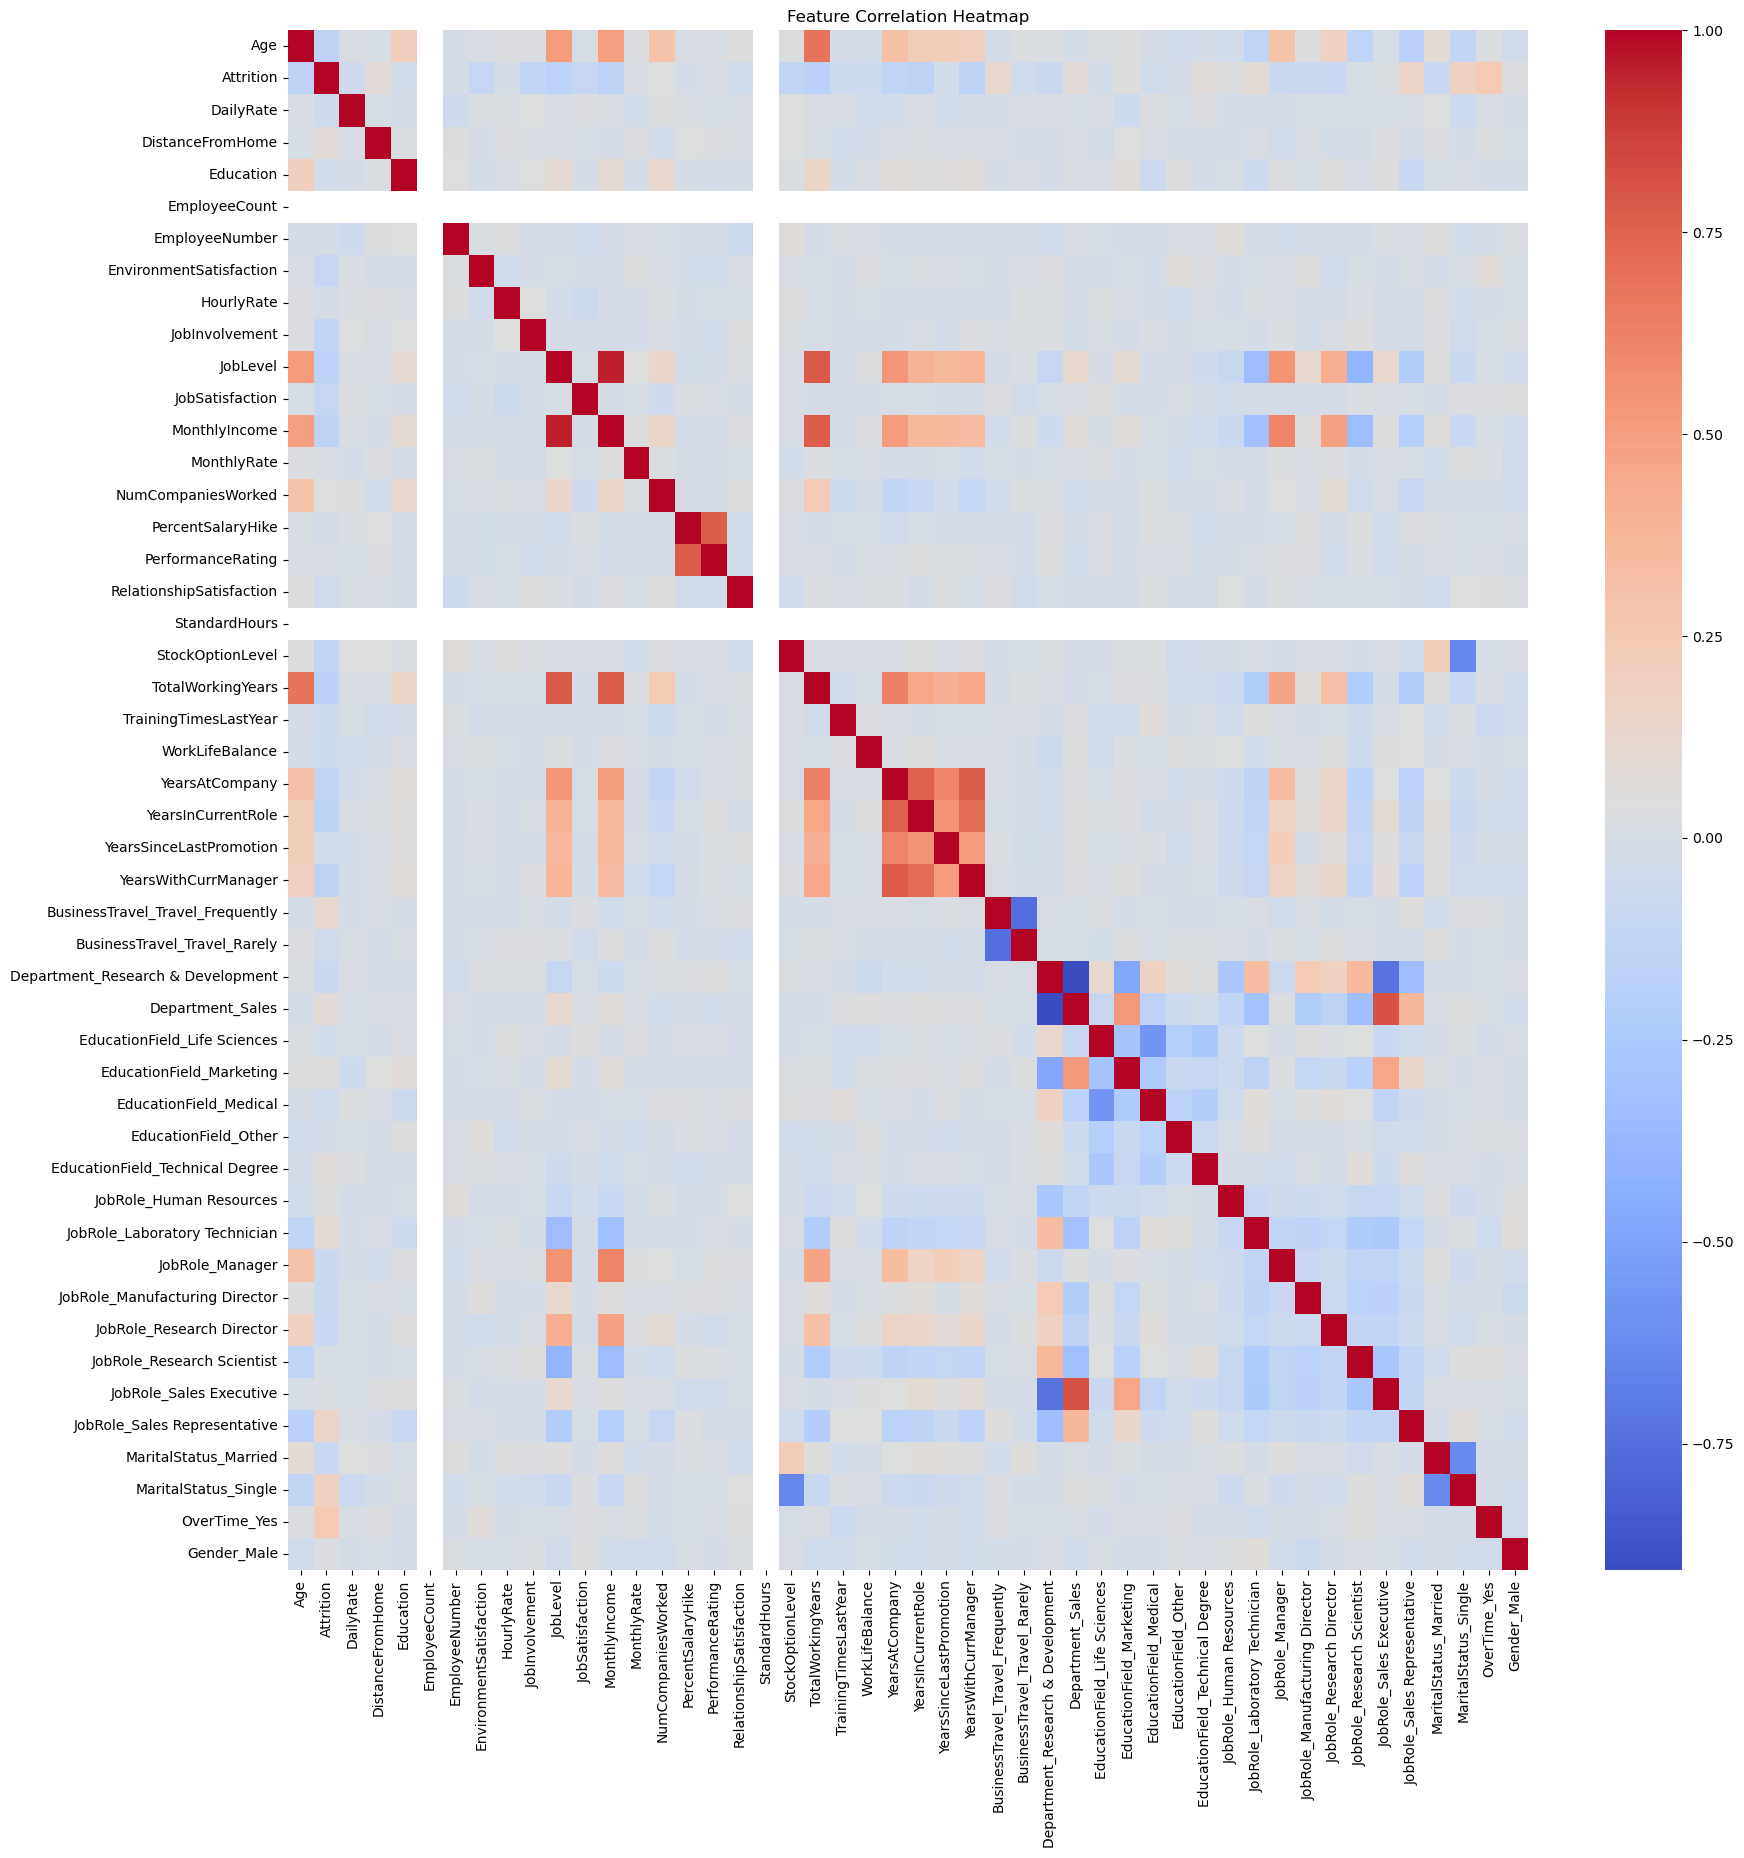

In [195]:
#view correlation of the features
correlation_matrix = hr_data_encoded.corr()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [196]:
# view correlation of features and attrition
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
print(attrition_corr)

Attrition                            1.000000
OverTime_Yes                         0.246118
MaritalStatus_Single                 0.175419
JobRole_Sales Representative         0.157234
BusinessTravel_Travel_Frequently     0.115143
JobRole_Laboratory Technician        0.098290
Department_Sales                     0.080855
DistanceFromHome                     0.077924
EducationField_Technical Degree      0.069355
EducationField_Marketing             0.055781
NumCompaniesWorked                   0.043494
JobRole_Human Resources              0.036215
Gender_Male                          0.029453
JobRole_Sales Executive              0.019774
MonthlyRate                          0.015170
PerformanceRating                    0.002889
JobRole_Research Scientist          -0.000360
HourlyRate                          -0.006846
EmployeeNumber                      -0.010577
PercentSalaryHike                   -0.013478
EducationField_Other                -0.017898
Education                         

In [197]:
#attrition_corr = attrition_corr.dropna()
#print(attrition_corr)

In [198]:
# Assign X (data) and y (target)
X = hr_data.drop(columns='Attrition')
y = hr_data['Attrition']


In [199]:
#train, test and split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [200]:
# review y_train value counts
y_train.value_counts()

Attrition
0    913
1    189
Name: count, dtype: int64

In [201]:
#one hot encode the categorical columns
categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Over18', 'Gender']
encoder = OneHotEncoder()

X_train_OHE = encoder.fit_transform(X_train[categorical_cols])
X_test_OHE  = encoder.transform(X_test[categorical_cols])

In [202]:

#columns_OHE = encoder.get_feature_names_out(categorical_cols)  # Get feature names

#X_train_OHE_df = pd.DataFrame(X_train_OHE, columns=columns_OHE, index=X_train.index)
#X_test_OHE_df = pd.DataFrame(X_test_OHE, columns=columns_OHE, index=X_test.index)



In [203]:
X_train.dtypes

Age                          int64
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYea

In [204]:
#run standard scaler on X_train 'Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])

In [205]:
#run standard scaler on X_test
X_test_scaled = scaler.transform(X_test[numerical_cols])


In [206]:
y_test.dtype

dtype('int64')

In [207]:
y_test.value_counts()

Attrition
0    320
1     48
Name: count, dtype: int64

In [208]:
y_train.dtype

dtype('int64')

In [209]:
y_train.value_counts()

Attrition
0    913
1    189
Name: count, dtype: int64

In [210]:
# For classification, keep y_train and y_test as they are
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [211]:
#y_train_scaled = scaler.fit_transform(y_train)
#y_test_scaled = scaler.transform(y_test)

In [212]:
#combine the scaled numerical columns and the one hot encoded columns
#X_train_final = np.concatenate([X_train_scaled, X_train_OHE.toarray()], axis=1)
X_train_combined = pd.concat([
    pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index),
    pd.DataFrame(X_train_OHE.toarray(), columns=encoder.get_feature_names_out(categorical_cols), index=X_train.index)
], axis=1)

X_test_combined = pd.concat([
    pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index),
    pd.DataFrame(X_test_OHE.toarray(), columns=encoder.get_feature_names_out(categorical_cols), index=X_test.index)
], axis=1)

X_train_combined.head() 

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y,Gender_Female,Gender_Male
1343,-0.852159,-0.508455,-0.285906,0.094018,0.0,1.419614,1.190392,-0.374600,0.393923,-0.934008,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1121,-0.093088,0.209318,-1.017204,1.053349,0.0,0.928104,-0.641748,0.309668,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1048,-0.309965,1.295810,-0.773438,0.094018,0.0,0.751623,1.190392,0.700678,-2.415809,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1393,-1.069036,0.381387,-0.042139,0.094018,0.0,1.554862,1.190392,-1.107744,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
527,-0.526843,0.319933,0.079744,0.094018,0.0,-0.495295,1.190392,-0.570105,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [213]:
X_train_combined.dtypes

Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EmployeeCount                        float64
EmployeeNumber                       float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StandardHours                        float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCom

In [214]:

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_combined, y_train)


RandomForestClassifier(random_state=42)

In [215]:
columns_combined = encoder.get_feature_names_out()
feature_importance = rf_model.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X_train_combined.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importances)


                              Feature  Importance
11                      MonthlyIncome    0.076968
0                                 Age    0.051611
19                  TotalWorkingYears    0.048703
1                           DailyRate    0.047505
5                      EmployeeNumber    0.046691
22                     YearsAtCompany    0.043423
51                       OverTime_Yes    0.042323
12                        MonthlyRate    0.038409
2                    DistanceFromHome    0.037943
7                          HourlyRate    0.037316
13                 NumCompaniesWorked    0.033321
25               YearsWithCurrManager    0.032420
50                        OverTime_No    0.030720
14                  PercentSalaryHike    0.028905
23                 YearsInCurrentRole    0.028486
18                   StockOptionLevel    0.025539
6             EnvironmentSatisfaction    0.025415
24            YearsSinceLastPromotion    0.023765
20              TrainingTimesLastYear    0.023071


In [216]:
len(X_train_combined.columns)

55

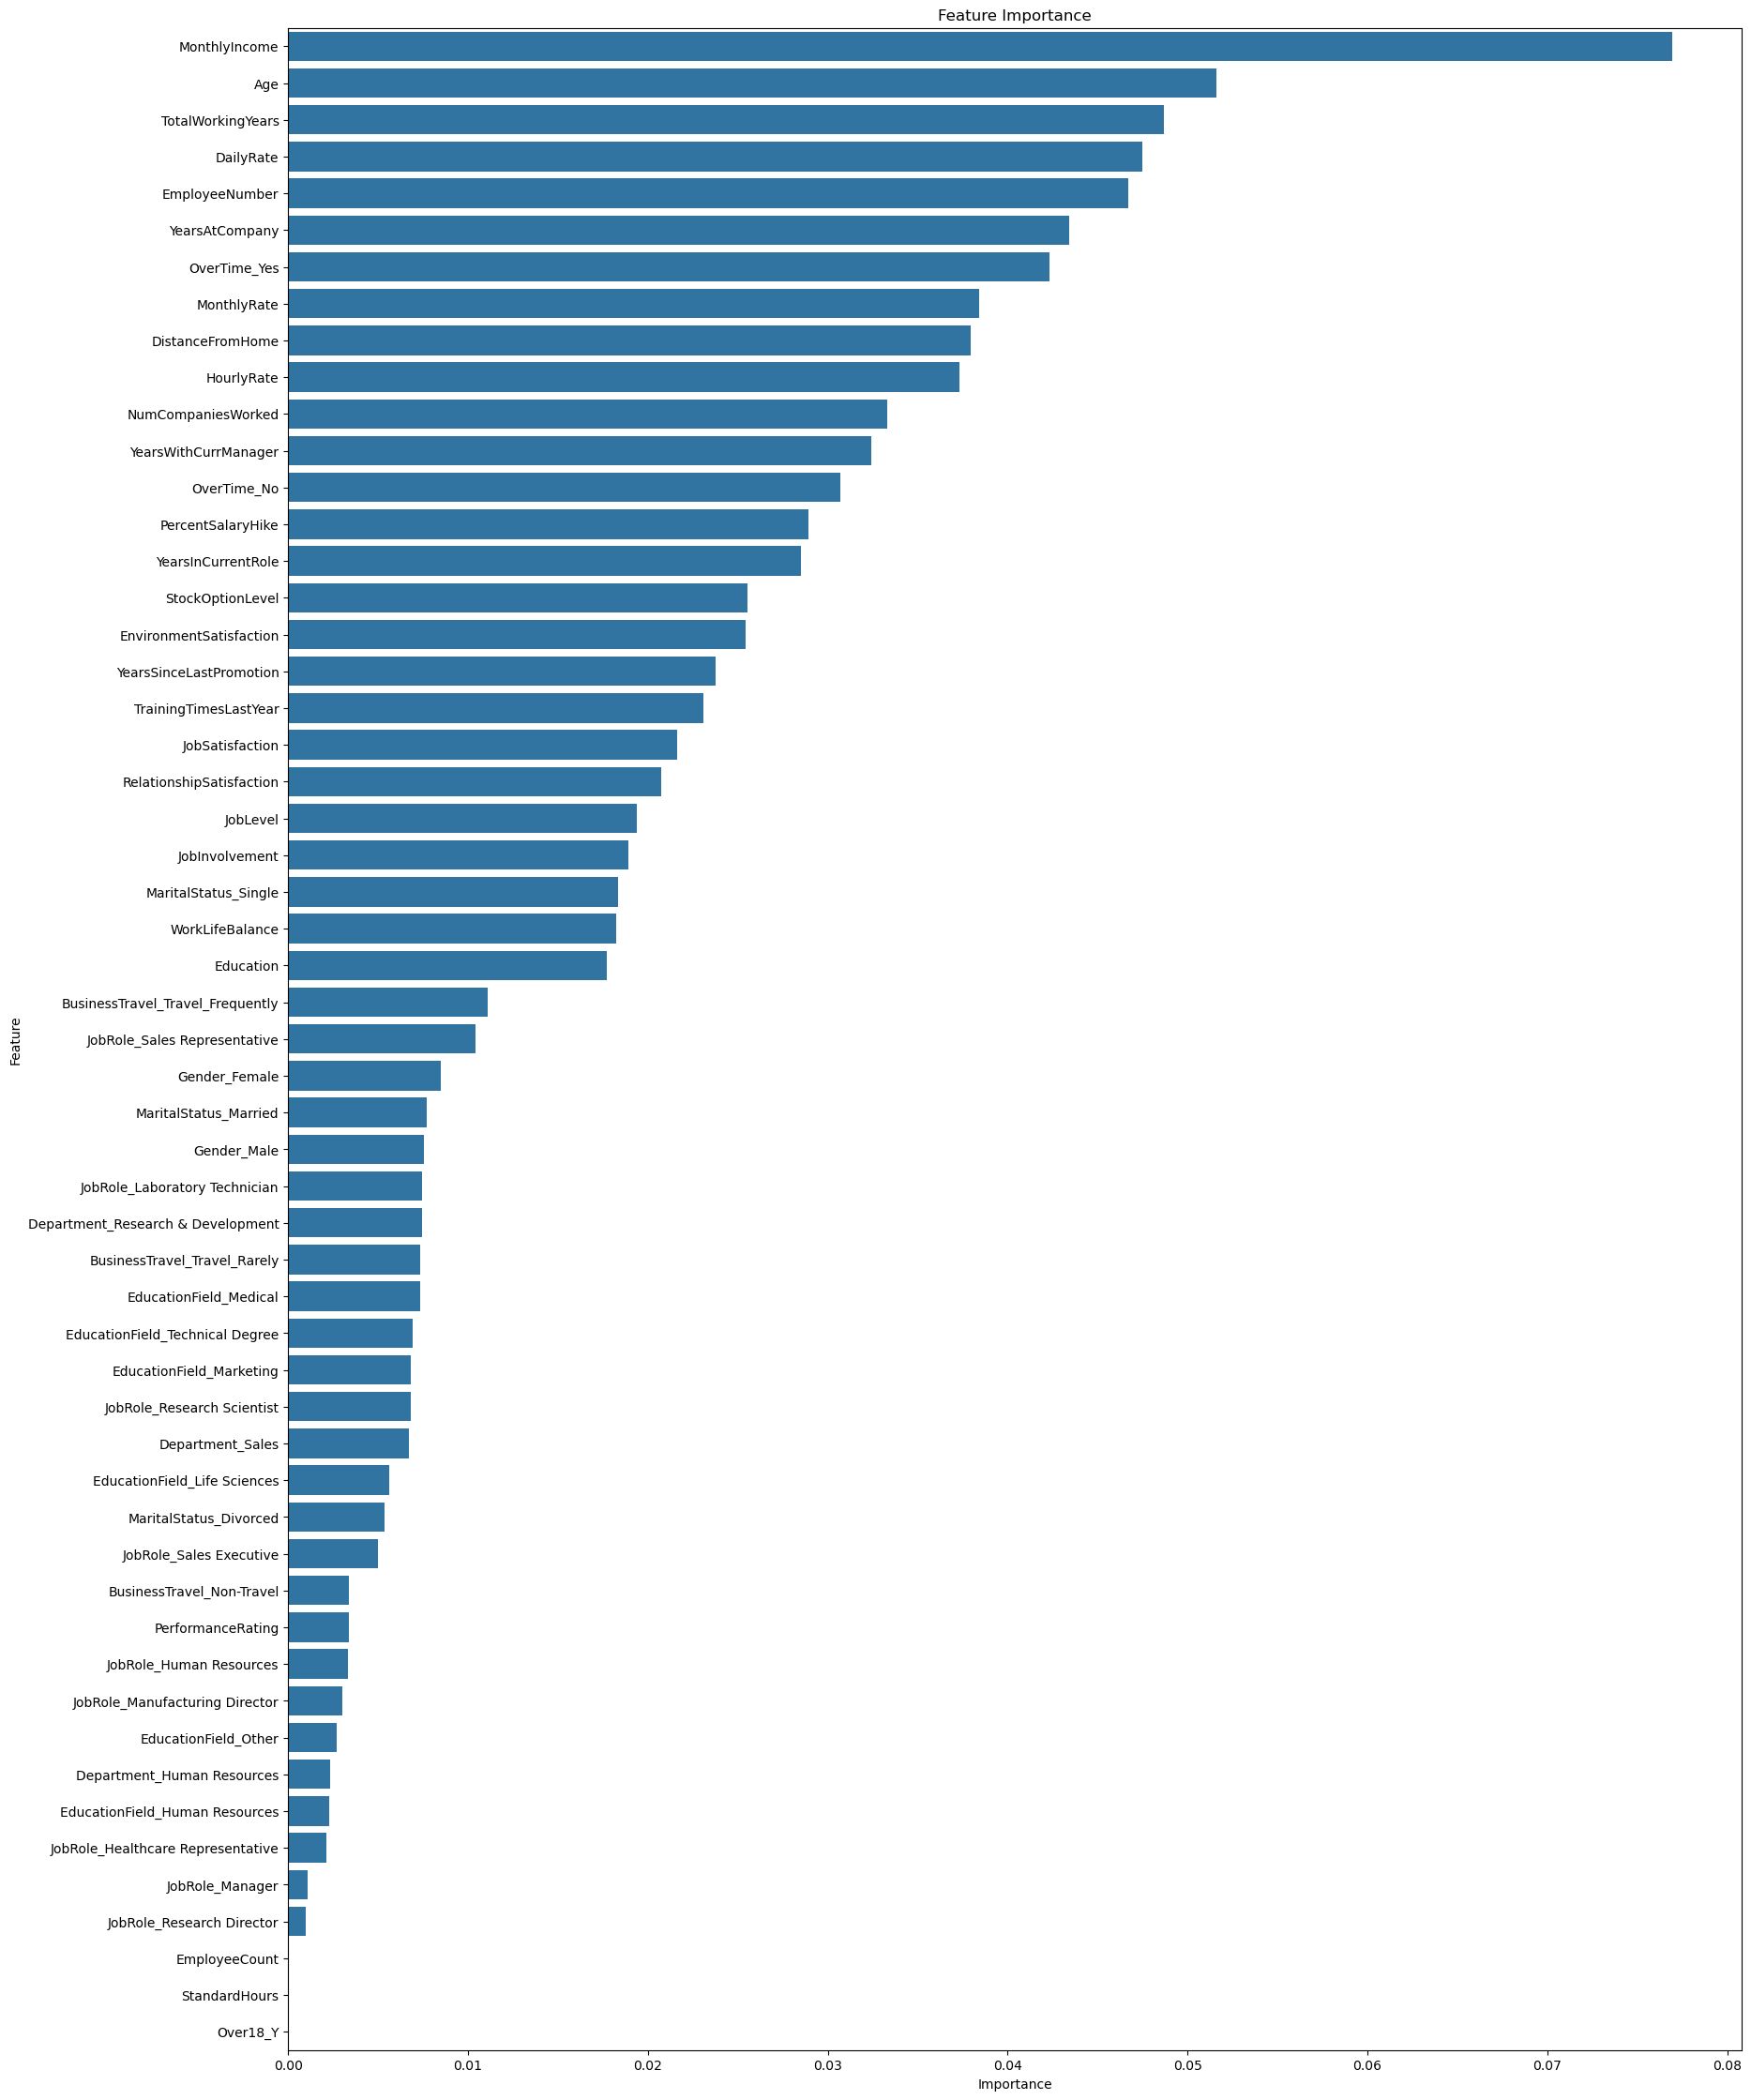

In [217]:
plt.figure(figsize=(20, 28))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title("Feature Importance")
plt.show()

In [218]:
irrelevant_features = feature_importances[feature_importances['Importance'] < 0.02]['Feature'].values
print(irrelevant_features)

['JobLevel' 'JobInvolvement' 'MaritalStatus_Single' 'WorkLifeBalance'
 'Education' 'BusinessTravel_Travel_Frequently'
 'JobRole_Sales Representative' 'Gender_Female' 'MaritalStatus_Married'
 'Gender_Male' 'JobRole_Laboratory Technician'
 'Department_Research & Development' 'BusinessTravel_Travel_Rarely'
 'EducationField_Medical' 'EducationField_Technical Degree'
 'EducationField_Marketing' 'JobRole_Research Scientist'
 'Department_Sales' 'EducationField_Life Sciences'
 'MaritalStatus_Divorced' 'JobRole_Sales Executive'
 'BusinessTravel_Non-Travel' 'PerformanceRating' 'JobRole_Human Resources'
 'JobRole_Manufacturing Director' 'EducationField_Other'
 'Department_Human Resources' 'EducationField_Human Resources'
 'JobRole_Healthcare Representative' 'JobRole_Manager'
 'JobRole_Research Director' 'EmployeeCount' 'StandardHours' 'Over18_Y']


In [219]:
#X_train_filtered = X_train_combined.drop(columns=irrelevant_features)
#X_test_filtered = X_test_combined.drop(columns=irrelevant_features)


In [220]:
X_test_combined.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
       'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'JobRole_Healthcare Representative', 

In [221]:
X_train_combined[1:5]

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes,Over18_Y,Gender_Female,Gender_Male
1121,-0.093088,0.209318,-1.017204,1.053349,0.0,0.928104,-0.641748,0.309668,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
1048,-0.309965,1.295810,-0.773438,0.094018,0.0,0.751623,1.190392,0.700678,-2.415809,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
1393,-1.069036,0.381387,-0.042139,0.094018,0.0,1.554862,1.190392,-1.107744,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
527,-0.526843,0.319933,0.079744,0.094018,0.0,-0.495295,1.190392,-0.570105,0.393923,-0.027156,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0


In [222]:
X_train_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1102 entries, 1343 to 1126
Data columns (total 55 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1102 non-null   float64
 1   DailyRate                          1102 non-null   float64
 2   DistanceFromHome                   1102 non-null   float64
 3   Education                          1102 non-null   float64
 4   EmployeeCount                      1102 non-null   float64
 5   EmployeeNumber                     1102 non-null   float64
 6   EnvironmentSatisfaction            1102 non-null   float64
 7   HourlyRate                         1102 non-null   float64
 8   JobInvolvement                     1102 non-null   float64
 9   JobLevel                           1102 non-null   float64
 10  JobSatisfaction                    1102 non-null   float64
 11  MonthlyIncome                      1102 non-null   float64

# Random Under Sampler

In [223]:
# Import RandomUnderSampler from imblearn
from imblearn.under_sampling import RandomUnderSampler

# Instantiate the RandomUnderSampler instance
rus = RandomUnderSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = rus.fit_resample(X_test_combined, y_test)

In [224]:
# Count distinct resampled values
y_resampled.value_counts()

Attrition
0    48
1    48
Name: count, dtype: int64

In [225]:
# Instantiate an initial RamdonForestClassifier instance
model = RandomForestClassifier()

# Fit the initial model based the training data
model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [226]:
# Instantiate a second RamdonForestClassifier instance
model_resampled = RandomForestClassifier()

# Fit the second model based the resampled data
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [227]:
# Make predictions using the initial model
y_pred = model.predict(X_test_combined)

# Make predictions using the model based on the resampled data
y_pred_resampled = model_resampled.predict(X_test_combined)

In [228]:
# Print classification report
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93       320
           1       0.80      0.08      0.15        48

    accuracy                           0.88       368
   macro avg       0.84      0.54      0.54       368
weighted avg       0.87      0.88      0.83       368

              precision    recall  f1-score   support

           0       1.00      0.70      0.82       320
           1       0.33      1.00      0.50        48

    accuracy                           0.74       368
   macro avg       0.67      0.85      0.66       368
weighted avg       0.91      0.74      0.78       368



# Random Over Sample #1

In [229]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_combined, y_train)

In [230]:
# Count distinct values
y_resampled.value_counts()

Attrition
0    913
1    913
Name: count, dtype: int64

In [231]:
# Create a RandomForestClassifier instance and fit it to the original data
model = RandomForestClassifier()
model.fit(X_resampled, y_resampled)

# Create a RandomForestClassifier instance and fit it to the resampled data
model_resampled = RandomForestClassifier()
model_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [232]:
# Make predictions for testing features
y_pred = model.predict(X_test_combined)
y_pred_resampled = model_resampled.predict(X_test_combined)

In [233]:
# Print the classification reports for the two models
print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_resampled))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.15      0.23        48

    accuracy                           0.87       368
   macro avg       0.69      0.56      0.58       368
weighted avg       0.83      0.87      0.84       368

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.54      0.15      0.23        48

    accuracy                           0.87       368
   macro avg       0.71      0.56      0.58       368
weighted avg       0.84      0.87      0.84       368



# SMOTE MODEL

In [234]:
# Import SMOTE from imblearn
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE instance 
# Set the sampling_strategy parameter equal to auto
smote_sampler = SMOTE(random_state=1, sampling_strategy='auto')


In [235]:
# Fit the training data to the smote_sampler model
X_resampled, y_resampled = smote_sampler.fit_resample(X_train_combined, y_train)

In [236]:
# Count distinct values for the resampled target data
y_resampled.value_counts()

Attrition
0    913
1    913
Name: count, dtype: int64

In [237]:
# Instantiate a new RandomForestClassier model 
smote_model = RandomForestClassifier()

# Fit the resampled data to the new model
smote_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [238]:
# Predict labels for resampled testing features
smote_y_pred = smote_model.predict(X_test_combined)

In [239]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, smote_y_pred))

# Print the classification reports for the two models
#print(classification_report(y_test, y_pred))
#print(classification_report(y_test, y_pred_resampled)

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.15      0.23        48

    accuracy                           0.87       368
   macro avg       0.69      0.56      0.58       368
weighted avg       0.83      0.87      0.84       368

---------
Classification Report - Resampled Data - SMOTE
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       320
           1       0.52      0.23      0.32        48

    accuracy                           0.87       368
   macro avg       0.71      0.60      0.62       368
weighted avg       0.85      0.87      0.85       368



# Random Over Sampler

In [240]:
# Import RandomOverSampler from imblearn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the RandomOverSampler instance
random_oversampler = RandomOverSampler(random_state=1)

# Fit the data to the model
X_resampled, y_resampled = random_oversampler.fit_resample(X_train_combined, y_train)

In [241]:
# Create a RandomForestClassifier instance and fit it to the original data
ROS_model = RandomForestClassifier()
ROS_model.fit(X_train_combined, y_train)



RandomForestClassifier()

In [242]:
# Create a RandomForestClassifier instance and fit it to the resampled data
ROS_resampled = RandomForestClassifier()
ROS_resampled.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [243]:
# Make predictions for testing features
y_pred = model.predict(X_test_combined)
y_pred_resampled = ROS_resampled.predict(X_test_combined)

In [244]:
# Count distinct values
y_resampled.value_counts()

Attrition
0    913
1    913
Name: count, dtype: int64

In [245]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTE")
print(classification_report(y_test, y_pred_resampled))

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.15      0.23        48

    accuracy                           0.87       368
   macro avg       0.69      0.56      0.58       368
weighted avg       0.83      0.87      0.84       368

---------
Classification Report - Resampled Data - SMOTE
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.15      0.23        48

    accuracy                           0.87       368
   macro avg       0.69      0.56      0.58       368
weighted avg       0.83      0.87      0.84       368



# SMOTEEN MODEL

In [246]:
# Import SMOTEEN from imblearn
from imblearn.combine import SMOTEENN

# Instantiate the SMOTEENN instance
smote_enn = SMOTEENN(random_state=1)

In [247]:
# Fit the model to the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train_combined, y_train)

In [248]:
# Create a RandomForestClassifier instance and fit it to the original data
smoteenn_model = RandomForestClassifier()
smoteenn_model.fit(X_train_combined, y_train)

RandomForestClassifier()

In [249]:
# Fit the resampled data the new model
smoteenn_model.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [250]:
# Predict labels for resampled testing features
smoteenn_y_pred = smoteenn_model.predict(X_test_combined)


In [251]:
#check the value counts
smoteenn_y_pred[1:5]

array([0, 1, 0, 0])

In [252]:
# Count distinct values
y_resampled.value_counts()

Attrition
1    890
0    350
Name: count, dtype: int64

In [253]:
# Print classification reports
print(f"Classification Report - Original Data")
print(classification_report(y_test, y_pred))
print("---------")
print(f"Classification Report - Resampled Data - SMOTEENN")
print(classification_report(y_test, smoteenn_y_pred))

Classification Report - Original Data
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       320
           1       0.50      0.15      0.23        48

    accuracy                           0.87       368
   macro avg       0.69      0.56      0.58       368
weighted avg       0.83      0.87      0.84       368

---------
Classification Report - Resampled Data - SMOTEENN
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       320
           1       0.27      0.62      0.38        48

    accuracy                           0.73       368
   macro avg       0.60      0.69      0.61       368
weighted avg       0.84      0.73      0.77       368



In [254]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Calculate class weights
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Train model with manual class weights
clf = RandomForestClassifier(class_weight=class_weights_dict, random_state=42)
clf.fit(X_resampled, y_resampled)

y_pred = clf.predict(X_resampled)
print(classification_report(y_test, smote_y_pred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       320
           1       0.52      0.23      0.32        48

    accuracy                           0.87       368
   macro avg       0.71      0.60      0.62       368
weighted avg       0.85      0.87      0.85       368



In [258]:
xgb_model = XGBClassifier(scale_pos_weight=10, random_state=42)  # scale_pos_weight adjusts for imbalance
xgb_model.fit(X_resampled, y_resampled)
y_pred_xgb = xgb_model.predict(X_resampled)
print("\nXGBoost Classification Report:")
print(classification_report(y_resampled, y_pred_xgb))


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       890

    accuracy                           1.00      1240
   macro avg       1.00      1.00      1.00      1240
weighted avg       1.00      1.00      1.00      1240



In [259]:
# Create three KNN classifiers
from sklearn.neighbors import KNeighborsClassifier
untuned_model = KNeighborsClassifier()
grid_tuned_model = KNeighborsClassifier()
random_tuned_model = KNeighborsClassifier()

In [261]:
## Train a model without tuning
from sklearn.metrics import classification_report
untuned_model.fit(X_resampled, y_resampled)
untuned_y_pred = untuned_model.predict(X_resampled)
print(classification_report(y_resampled, untuned_y_pred))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       350
           1       0.93      1.00      0.97       890

    accuracy                           0.95      1240
   macro avg       0.97      0.91      0.93      1240
weighted avg       0.95      0.95      0.95      1240



In [262]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
    'weights': ['uniform', 'distance'],
    'leaf_size': [10, 50, 100, 500]
}
grid_clf = GridSearchCV(X_train_combined, param_grid, verbose=3)

In [264]:
y_train.dtypes

dtype('int64')

In [265]:
X_train_combined.dtypes

Age                                  float64
DailyRate                            float64
DistanceFromHome                     float64
Education                            float64
EmployeeCount                        float64
EmployeeNumber                       float64
EnvironmentSatisfaction              float64
HourlyRate                           float64
JobInvolvement                       float64
JobLevel                             float64
JobSatisfaction                      float64
MonthlyIncome                        float64
MonthlyRate                          float64
NumCompaniesWorked                   float64
PercentSalaryHike                    float64
PerformanceRating                    float64
RelationshipSatisfaction             float64
StandardHours                        float64
StockOptionLevel                     float64
TotalWorkingYears                    float64
TrainingTimesLastYear                float64
WorkLifeBalance                      float64
YearsAtCom

In [263]:
# Fit the model by using the grid search estimator.
# This will take the KNN model and try each combination of parameters.


#grid_clf.fit(X_train_combined, y_train)
